# Задание 27. Программирование

|Проверяемые элементы<br/> содержания и виды деятельности  | Уровень сложности<br/> задания |Максимальный<br/>балл |Примерное время<br> выполнения (мин.)
|:---- |:---:|:---:|:---:|
| Умения создавать собственные<br>программы (20–40 строк) <br>для анализа числовых последовательностей | Высокий | 2 | 35


In [ ]:
# Загрузка файлов с данными из репозитория
! rm -r data repo
! git clone https://github.com/Antekov/inf-ege-tasks.git/ repo
! mv repo/2021/task27/data data
! rm -r repo

## Задача 1

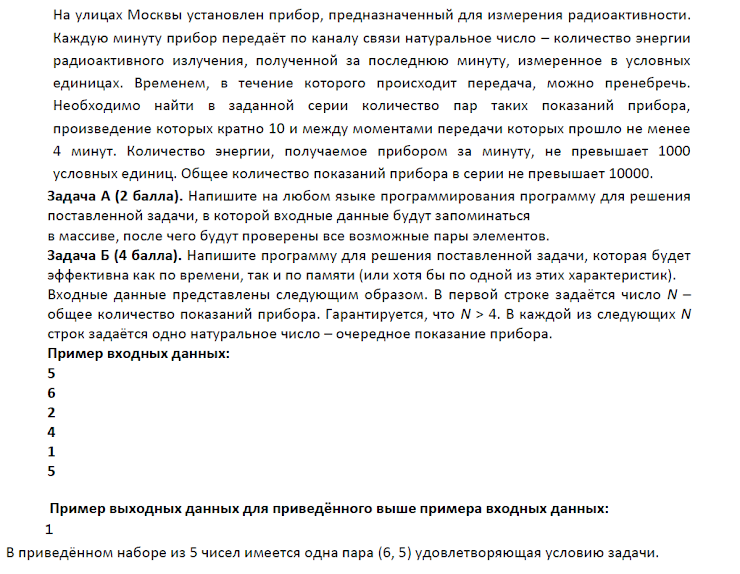

### Задача А

Для простоты тестирования сначала напишем код, котороый считывает данные не с клавиатуры, а берет из сгенерированного массива случайных чисел.

Решение задачи А тривиально - организуем перебор всех пар индексов массива, в которых второй индекс как минимум на 4 больше первого. Если для такой пары элементов выполнено условие делимости проиведения на 10, то увеличиваем счетчик.

Для наглядности будем помимо количества сохранять и сами пары чисел, которые выведем в конце в отсортированном виде.



In [ ]:
random.seed(1)
a = [random.randint(1,1000) for i in range(20)]
n = len(a)
count = 0
pairs = []
for i in range(n):
  for j in range(i+4, n):
    if (a[i] * a[j]) % 10 == 0:
      pairs.append((a[i], a[j]))
      count += 1

print(count)
print(*a)
print(*sorted(pairs), sep='\n')

58
138 583 868 822 783 65 262 121 508 780 461 484 668 389 808 215 97 500 30 915
(65, 30)
(65, 484)
(65, 500)
(65, 668)
(65, 780)
(65, 808)
(121, 30)
(121, 500)
(138, 30)
(138, 65)
(138, 215)
(138, 500)
(138, 780)
(138, 915)
(262, 30)
(262, 215)
(262, 500)
(262, 915)
(389, 30)
(389, 500)
(461, 30)
(461, 500)
(484, 30)
(484, 215)
(484, 500)
(484, 915)
(508, 30)
(508, 215)
(508, 500)
(508, 915)
(583, 30)
(583, 500)
(583, 780)
(668, 30)
(668, 500)
(668, 915)
(780, 30)
(780, 97)
(780, 215)
(780, 389)
(780, 500)
(780, 808)
(780, 915)
(783, 30)
(783, 500)
(783, 780)
(808, 30)
(808, 915)
(822, 30)
(822, 215)
(822, 500)
(822, 780)
(822, 915)
(868, 30)
(868, 215)
(868, 500)
(868, 780)
(868, 915)


Теперь модифицируем его для чтения данных с клавиатуры

In [ ]:
# Задача А
n = int(input())
a = [int(input()) for i in range(n)]

count = 0
for i in range(n):
  for j in range(i+4, n):
    if (a[i] * a[j]) % 10 == 0:
      count += 1

print(count)

5
6
2
4
1
5
1


### Задача Б

Для достижения эффективности по времени и по памяти необходимо избавиться от необходимости хранения всех чисел последовательности в памяти. Если хранить одновременно только 4 последних числа последовательности, то читая следующее число можно вычислить, на сколько увеличится количество подходящих пар чисел.

При этом автоматически отпадет необходимость во вложенном цикле, которой увеличивал временую сложность предыдущего решения до квадратичной.

Вначале напишем код для обработки чисел из сгенерированного случайного массива, но к его элементам мы будем обращаться только однократно, то есть его можно будет заменить чтением чисел с клавиатуры по одному.

In [ ]:
random.seed(1)
b = [random.randint(1,1000) for i in range(20)] # Список всех чисел для обработки
n = len(b) 
a = [0]*4   # Буферный массив для хранения четырех последних прочитанных чисел
m10 = 0     # Количество чисел, делящихся на 10, идущих как минимум на 4 элемента раньше последнего прочитанного числа
m2 = 0      # Количество чисел, делящихся на 2, идущих как минимум на 4 элемента раньше последнего прочитанного числа
m5 = 0      # Количество чисел, делящихся на 5, идущих как минимум на 4 элемента раньше последнего прочитанного числа
count = 0   # Количество подходящих пар, в которых произведение чисел делится на 10
pairs = []  # Список подходящих пар
n10 = []    # Список чисел, делящихся на 10, идущих как минимум на 4 элемента раньше последнего прочитанного числа
n2 = []     # Список чисел, делящихся на 2, идущих как минимум на 4 элемента раньше последнего прочитанного числа
n5 = []     # Список чисел, делящихся на 5, идущих как минимум на 4 элемента раньше последнего прочитанного числа
c = []      # Список всех чисел, идущих как минимум на 4 элемента раньше последнего прочитанного числа

# Читаем первые 4 числа в буферный массив
for i in range(0, 4):
  a[i] = b[i] 

# Читаем по одному все остальные числа
for i in range(4, n):
  x = b[i]      # Последнее прочитанное число

  y = a[i % 4]  # Самое раннее прочитанное число из последних четырех
  c.append(y)   # Добавляем его в список всех чисел, идущих как минимум на 4 элемента раньше последнего прочитанного числа

  # Если это число делится на 10, 2, 5, то обновляем количества и списки таких чисел
  if y % 10 == 0:
    m10 += 1
    n10.append(y)
  elif y % 2 == 0:
    m2 += 1
    n2.append(y)
  elif y % 5 == 0:
    m5 += 1
    n5.append(y)

  if x % 10 == 0:       # Если последнее число делится на 10,
    count += i - 4 + 1  # то к нему в пару можно взять любое из ранее встречавшихся чисел, которых будет (i - 4 + 1) штук
    pairs = pairs + [(p, x) for p in c]
  elif x % 2 == 0:      # Если последнее число делится на 2,
    count += (m5 + m10) # то к нему в пару можно взять ранее идущие числа, делящиеся на 5 и на 10
    pairs = pairs + [(p, x) for p in n5]
    pairs = pairs + [(p, x) for p in n10]
  elif x % 5 == 0:      # Если последнее число делится на 5,
    count += (m2 + m10) # то к нему в пару можно взять ранее идущие числа, делящиеся на 2 и на 10
    pairs = pairs + [(p, x) for p in n2]
    pairs = pairs + [(p, x) for p in n10]
  else:                 # иначе к нему в пару можно взять ранее идущие числа, делящиеся на 10
    count += m10
    pairs = pairs + [(p, x) for p in n10]

  a[i % 4] = x  # Сохраняем в буферный массив последнее прочитанное число

print(count)
print(*b)
print(*sorted(pairs), sep='\n')

58
138 583 868 822 783 65 262 121 508 780 461 484 668 389 808 215 97 500 30 915
(65, 30)
(65, 484)
(65, 500)
(65, 668)
(65, 780)
(65, 808)
(121, 30)
(121, 500)
(138, 30)
(138, 65)
(138, 215)
(138, 500)
(138, 780)
(138, 915)
(262, 30)
(262, 215)
(262, 500)
(262, 915)
(389, 30)
(389, 500)
(461, 30)
(461, 500)
(484, 30)
(484, 215)
(484, 500)
(484, 915)
(508, 30)
(508, 215)
(508, 500)
(508, 915)
(583, 30)
(583, 500)
(583, 780)
(668, 30)
(668, 500)
(668, 915)
(780, 30)
(780, 97)
(780, 215)
(780, 389)
(780, 500)
(780, 808)
(780, 915)
(783, 30)
(783, 500)
(783, 780)
(808, 30)
(808, 915)
(822, 30)
(822, 215)
(822, 500)
(822, 780)
(822, 915)
(868, 30)
(868, 215)
(868, 500)
(868, 780)
(868, 915)


Теперь модифицируем его для чтения данных с клавиатуры и уберем лишнее

In [ ]:
# Задача Б
n = int(input()) 
a = [0]*4   # Буферный массив для хранения четырех последних прочитанных чисел
m10 = 0     # Количество чисел, делящихся на 10, идущих как минимум на 4 элемента раньше последнего прочитанного числа
m2 = 0      # Количество чисел, делящихся на 2, идущих как минимум на 4 элемента раньше последнего прочитанного числа
m5 = 0      # Количество чисел, делящихся на 5, идущих как минимум на 4 элемента раньше последнего прочитанного числа
count = 0   # Количество подходящих пар, в которых произведение чисел делится на 10

# Читаем первые 4 числа в буферный массив
for i in range(0, 4):
  a[i] = int(input()) 

# Читаем по одному все остальные числа
for i in range(4, n):
  x = int(input())      # Последнее прочитанное число

  y = a[i % 4]  # Самое раннее прочитанное число из последних четырех
  
  # Если это число делится на 10, 2, 5, то обновляем количества таких чисел
  if y % 10 == 0:
    m10 += 1
  elif y % 2 == 0:
    m2 += 1
  elif y % 5 == 0:
    m5 += 1

  if x % 10 == 0:       # Если последнее число делится на 10,
    count += i - 4 + 1  # то к нему в пару можно взять любое из ранее встречавшихся чисел, которых будет (i - 4 + 1) штук
  elif x % 2 == 0:      # Если последнее число делится на 2,
    count += (m5 + m10) # то к нему в пару можно взять ранее идущие числа, делящиеся на 5 и на 10
  elif x % 5 == 0:      # Если последнее число делится на 5,
    count += (m2 + m10) # то к нему в пару можно взять ранее идущие числа, делящиеся на 2 и на 10
  else:                 # иначе к нему в пару можно взять ранее идущие числа, делящиеся на 10
    count += m10

  a[i % 4] = x  # Сохраняем в буферный массив последнее прочитанное число

print(count)

20
138
583
868
822
783
65
262
121
508
780
461
484
668
389
808
215
97
500
30
915
58


## Задача 2

Имеется набор данных, состоящий из пар положительных целых чисел. Необходимо выбрать из каждой пары ровно одно число так, чтобы сумма всех выбранных чисел не делилась на 3 и при этом была максимально возможной. Гарантируется, что искомую сумму получить можно. Программа должна напечатать одно число — максимально возможную сумму, соответствующую условиям задачи.

Входные данные.

Файл A

Файл B

Даны два входных файла (файл A и файл B), каждый из которых содержит в первой строке количество пар N (1 ≤ N ≤ 100000). Каждая из следующих N строк содержит два натуральных числа, не превышающих 10 000.

Пример организации исходных данных во входном файле:

6

1 3

5 12

6 9

5 4

3 3

1 1

Для указанных входных данных значением искомой суммы должно быть число 32.

В ответе укажите два числа: сначала значение искомой суммы для файла А, затем для файла B.

https://inf-ege.sdamgia.ru/problem?id=27424

### Задача А

In [ ]:
f = open ("./data/27-A_demo.txt")
a = int(f.readline())
s = 0
s_max = 0

numbers = []
for i in range(a):
    n = f.readline()
    p1 = int(n.split()[0])
    p2 = int(n.split()[1])
    numbers.append((p1, p2))

for k in range(2**a):
    x = k
    indexes = []
    while x > 0:
        indexes.append(x % 2)
        x //= 2
    indexes += [0] * (a - len(indexes))
    # print(k, indexes)
    s = 0
    for i in range(len(indexes)):
        p = indexes[i]
        s += numbers[i][p]

    if s % 3 != 0 and s > s_max:
        s_max = s

print(s_max)

### Задача Б

In [ ]:
f = open ("./data/27-B_demo.txt")
n = int(f.readline())
s = 0
min_diff = 100000

for i in range(n):
    pair = [int(x) for x in f.readline().split()]
    diff = abs(pair[0] - pair[1])
    if diff < min_diff and diff % 3 != 0:
        min_diff = diff

    s += max(pair)

if s % 3 != 0:
    print(s)
else:
    print(s - min_diff)

## Задача 4

Набор данных состоит из пар натуральных чисел. Необходимо выбрать из каждой пары ровно одно число так, чтобы сумма всех выбранных чисел делилась на 3 и при этом была максимально возможной.

Входные данные.

Файл A

Файл B

Первая строка входного файла содержит число N — общее количество пар в наборе. Каждая из следующих N строк содержит два натуральных числа, не превышающих 10 000.

Пример организации исходных данных во входном файле:

6

1 3

5 10

6 9

5 4

3 3

1 1

Для указанных данных искомая сумма равна 30.

В ответе укажите два числа: сначала значение искомой суммы для файла А, затем для файла B.

https://inf-ege.sdamgia.ru/problem?id=29675

In [ ]:
f = open ("task27/29675e.txt")
n = int(f.readline())
s = 0
# Список минимальных разностей, на которые можно уменьшить общую сумму
# если остаток от деления на 3 общей суммы уменьшится на 0, 1, 2
min_diffs = [100000] * 3

for i in range(n):
    pair = [int(x) for x in f.readline().split()]
    diff = abs(pair[0] - pair[1])

    r = diff % 3
    
    print(f'pair = {pair}, diff = {diff}, r = {r}')
    print(min_diffs)
    diffs = min_diffs.copy()

    if diff < min_diffs[r]:
        diffs[r] = diff
        print(f'Update diffs[{r}] = {diff}')
    if diff + min_diffs[1] < min_diffs[(1 + r) % 3]:
        diffs[(1 + r) % 3] = diff + min_diffs[1]
        print(f'Update diffs[{(1 + r) % 3}] = {diff} + {min_diffs[1]}')
    if diff + min_diffs[2] < min_diffs[(2 + r) % 3]:
        diffs[(2 + r) % 3] = diff + min_diffs[2]
        print(f'Update diffs[{(2 + r) % 3}] = {diff} + {min_diffs[2]}')

    min_diffs = diffs
    
    s += max(pair)

if s % 3 == 0:
    print(s)
else:
    print(s - min_diffs[s % 3])

'''

s = 38
38 % 3 = 2

10, 5 (2)
10, 9 (1)
9,  8 (1)
9,  6 (0)

38 - 10 + 5 = 38 - 5 = 33

(38 - 5) % 3 = (38 % 3 - 5 % 3) % 3 = (2 - 2) % 3 = 0

38 - (10 - 9) - (9 - 8) = 38 - 1 - 1 = 36
'''

## Задача 2

Девочка Инесса любит собирать магниты из разных городов России, в которых она побывала. Ее родители большие путешественники, поэтому у Инессы накопилось много таких магнитов. Поехав однажды с родителями в магазин Икея, девочка увидела магнитные доски различного размера. Ей очень захотелось купить такую доску для своих магнитов и поставить ее в своей комнате. 

Родители Инессы поддержали ее идею, но сказали, что она сама должна выбрать размер доски. Инесса прошла по рядам магнитных досок и поняла, что все они квадратные, хотя и разные по величине. Девочка знает, что ее магниты все одинаковые по размеру, длина равна $x$, ширина $y$. И, естественно, магнит нельзя поворачивать, т. к. это будет некрасиво выглядеть. Мама отметила, что один магнит не должен закрывать другой, но они могут стыковаться. 

Помогите Инессе написать программу для вычисления минимальной длины магнитной доски, на которой девочка разместит все свои магниты. Ответом служит одно целое число.

**Входные данные**: три целых числа, записанные через пробел: $x$, $y$, $n$ из диапазона $10^9$. 

**Выходные данные**: одно число, ответ на задачу.

In [ ]:
x=735366
y=665225
z=1625357

In [ ]:
x=222313435
y=918269789
z=250968511

In [ ]:
x=795590398
y=692213045
z=873320750

In [ ]:
x = 5
y = 2
z = 9

In [ ]:
x=735366
y=665225
z=1625357

# Ожидаемый ответ: 891998958 (n*m = 1340*1213 > z)

def task25_2(x, y, z, debug=False):
  a = max(x, y)
  z -= 1
  n, m = 1, 1

  while z > 0:
    # Можем ли мы положить магнит не меняя размер доски?
    if (n+1)*y <= a:
      n += 1
      z -= m
    elif (m+1)*x <= a:
      m += 1
      z -= n
    elif (y - a % y) <= (x - a % x):
      n += 1
      z -= m
      a += y - a % y
    else:
      m += 1
      z -= n
      a += x - a % x
    if debug: print(a, n, m, z)
  
  return (a, n, m)


In [ ]:
task25_2(x, y, z)

(21931244911268, 31682, 27566)

In [ ]:
z / 31682 * x < 21931244911268, \
z / 27566 * y < 21931244911268

(True, True)

In [ ]:
length = 735366
width = 665225
amount = 1625357
max_value = max(length, width)
min_value = min(length, width)
length_board = max_value
width_board = min_value
level = 1
amount_need_to_put = 0
amount -= 1
while amount > 0:
    if min_value + width_board <= length_board + max_value:
        width_board += min_value
        amount -= level
        amount_need_to_put += 1
    else:
        level += 1
        length_board += max_value
        amount -= amount_need_to_put
print(max(length_board, width_board))


892066725


In [ ]:
task25_2(x, y, z, True)

In [ ]:
1341*y, 1213*x

(892066725, 891998958)

In [ ]:
task1(10, 2, 4, True)

10 2 1 2
10 3 1 1
10 4 1 0


(10, 4, 1)

In [ ]:
task1(2, 10, 4, True)

10 1 2 2
10 1 3 1
10 1 4 0


(10, 1, 4)

In [ ]:
task1(2, 2, 4, True)

4 2 1 2
4 2 2 0


(4, 2, 2)

In [ ]:
task1(2, 2, 5, True)

4 2 1 3
4 2 2 1
6 3 2 -1


(6, 3, 2)

In [ ]:
task1(5, 7, 35, True)

10 1 2 33
14 2 2 31
15 2 3 29
20 2 4 27
21 3 4 23
25 3 5 20
28 4 5 15
30 4 6 11
35 5 6 5
35 5 7 0


(35, 5, 7)

In [ ]:
x=735366
y=665225
z=1625357
task1(x, y, z, True)

NameError: ignored

In [ ]:
1341*1213 - z

1276

In [ ]:
1340*1213 - z

63

In [ ]:
1340*y, 1213*x

(891401500, 891998958)

## Задача 7

(Д.Ф. Муфаззалов) Имеется набор данных, состоящий из троек положительных целых чисел. Необходимо выбрать из каждой тройки два числа так, чтобы сумма всех выбранных чисел делилась на $4$ и при этом была максимально возможной. Гарантируется, что искомую сумму получить можно. Программа должна напечатать одно число – максимально возможную сумму, соответствующую условиям задачи.
Входные данные. Даны два входных файла ([файл A](https://kpolyakov.spb.ru/cms/files/ege-stream/33/27-33a.txt) и [файл B](https://kpolyakov.spb.ru/cms/files/ege-stream/33/27-33b.txt)), каждый из которых содержит в первой строке количество троек $N$ ($1 ≤ N ≤ 100000$). Каждая из следующих $N$ строк содержит три натуральных числа, не превышающих $10\ 000$.

Пример входного файла:
```
6
8 3 4
4 8 12
9 5 6
2 8 3
12 3 5
1 4 12
```
Для указанных входных данных значением искомой суммы должно быть число $88$.
В ответе укажите два числа: сначала искомое значение для файла А, затем для файла B.

https://kpolyakov.spb.ru/school/ege/gen.php?action=viewTopic&topicId=2693

$18380$ $58701760$

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('./27-33a.txt', sep=' ', skiprows=1, header=None)
df.head()

,0,1,2
0,373,178,125
1,458,104,638
2,216,159,300
3,399,136,613
4,542,33,416


In [ ]:
df = np.array(df)
df

array([[373, 178, 125],
       [458, 104, 638],
       [216, 159, 300],
       [399, 136, 613],
       [542,  33, 416],
       [646, 285, 432],
       [421,  72, 235],
       [298, 217, 108],
       [733, 135, 825],
       [550, 343, 102],
       [772,  37, 448],
       [749,  30, 956],
       [473, 297,  53],
       [885, 106, 213],
       [671, 315, 208],
       [203, 692,  83],
       [348, 158,  86],
       [208, 316, 164],
       [352, 133, 174],
       [939,  32, 472]])

In [ ]:
df.sort(axis=1)
df[:5]

array([[125, 178, 373],
       [104, 458, 638],
       [159, 216, 300],
       [136, 399, 613],
       [ 33, 416, 542]])

In [ ]:
df = np.hstack((df, (df[:, 2] - df[:, 1]).reshape(len(df),1), (df[:, 2] - df[:, 0]).reshape(len(df),1)))
df = np.hstack((df, (df[:, 3] % 4).reshape(len(df), 1), (df[:, 4] % 4).reshape(len(df), 1)))
df[:5]

array([[125, 178, 373, 195, 248,   3,   0],
       [104, 458, 638, 180, 534,   0,   2],
       [159, 216, 300,  84, 141,   0,   1],
       [136, 399, 613, 214, 477,   2,   1],
       [ 33, 416, 542, 126, 509,   2,   1],
       [285, 432, 646, 214, 361,   2,   1],
       [ 72, 235, 421, 186, 349,   2,   1],
       [108, 217, 298,  81, 190,   1,   2],
       [135, 733, 825,  92, 690,   0,   2],
       [102, 343, 550, 207, 448,   3,   0],
       [ 37, 448, 772, 324, 735,   0,   3],
       [ 30, 749, 956, 207, 926,   3,   2],
       [ 53, 297, 473, 176, 420,   0,   0],
       [106, 213, 885, 672, 779,   0,   3],
       [208, 315, 671, 356, 463,   0,   3],
       [ 83, 203, 692, 489, 609,   1,   1],
       [ 86, 158, 348, 190, 262,   2,   2],
       [164, 208, 316, 108, 152,   0,   0],
       [133, 174, 352, 178, 219,   2,   3],
       [ 32, 472, 939, 467, 907,   3,   3]])

In [ ]:
np.sum(df, axis=0)[1] + np.sum(df, axis=0)[2], (np.sum(df, axis=0)[1] + np.sum(df, axis=0)[2]) % 4

(18474, 2)

In [ ]:
pd.DataFrame(df).sort_values(by=[5, 6, 3, 4], axis=0)

,0,1,2,3,4,5,6
17,164,208,316,108,152,0,0
12,53,297,473,176,420,0,0
2,159,216,300,84,141,0,1
8,135,733,825,92,690,0,2
1,104,458,638,180,534,0,2
10,37,448,772,324,735,0,3
14,208,315,671,356,463,0,3
13,106,213,885,672,779,0,3
15,83,203,692,489,609,1,1
7,108,217,298,81,190,1,2


In [ ]:
np.sum(df, axis=0)[1] + np.sum(df, axis=0)[2] - 92, (np.sum(df, axis=0)[1] + np.sum(df, axis=0)[2] - 92) % 4

(18382, 2)

In [ ]:
def task27_2693():
     data = open('./27-33a.txt').read().split('\n')
     data_len = int(data.pop(0))
     max_sum = 0
     max_remainder = 4
     remainder_arr = [99999] * max_remainder
     remainder_arr[0] = 0

     for i in range(0, data_len):
         data[i] = data[i].split(' ')
         data[i] = list(map(int, data[i]))
         data[i].sort()
         max_sum += data[i][2] + data[i][1]
         diff_a = data[i][2] - data[i][1]
         diff_b = data[i][1] - data[i][0]
         temp = remainder_arr.copy()

         for number in range(0, max_remainder):
             if remainder_arr[(number + diff_a) % max_remainder] > diff_a + remainder_arr[number]:
                 temp[(number + diff_a) % max_remainder] = diff_a + remainder_arr[number]
             if remainder_arr[(number + diff_b) % max_remainder] > diff_b + remainder_arr[number]:
                 temp[(number + diff_b) % max_remainder] = diff_b + remainder_arr[number]

         remainder_arr = temp
     if max_sum % max_remainder != 0:
         max_sum -= remainder_arr[max_sum % max_remainder]
     print(remainder_arr)
     print(max_sum)


In [ ]:
task27_2693()

[0, 81, 126, 195]
18348


In [ ]:
df = pd.read_csv('./27-33a.txt', sep=' ', skiprows=1, header=None)
df = np.array(df)
df.sort(axis=1)
df = pd.DataFrame(df)
df['01'] = df.loc[:,0] + df.loc[:,1]
df['02'] = df.loc[:,0] + df.loc[:,2]
df['12'] = df.loc[:,1] + df.loc[:,2]
df = df.iloc[:, [5,4,3]]
df.columns = (0,1,2)
df

,0,1,2
0,551,498,303
1,1096,742,562
2,516,459,375
3,1012,749,535
4,958,575,449
5,1078,931,717
6,656,493,307
7,515,406,325
8,1558,960,868
9,893,652,445


In [ ]:
3**20

3486784401

In [ ]:
%%time
data = np.array(df)
n = len(data)
print(n)
max_s = 0
for i in range(3**n):
  s = 0
  x = i
  for j in range(n):
    s += data[j, x % 3]
    x //= 2
  if s > max_s and s % 4 == 0:
    print(s)
    max_s = s

  if i > 10000000:
    break
print(max_s)

20
17872
18120
18364
18380
18380
CPU times: user 1min 51s, sys: 127 ms, total: 1min 51s
Wall time: 1min 51s


In [ ]:
df['0 - 1'] = df.loc[:,0] - df.loc[:,1]
df['0 - 2'] = df.loc[:,0] - df.loc[:,2]
df['(0 - 1) % 4'] = (df.loc[:,0] - df.loc[:,1]) % 4
df['(0 - 2) % 4'] = (df.loc[:,0] - df.loc[:,2]) % 4
df = df.sort_values(by=['(0 - 1) % 4', '0 - 1', '(0 - 2) % 4', '0 - 2'])
df

,0,1,2,0 - 1,0 - 2,(0 - 1) % 4,(0 - 2) % 4
44403,648,612,568,36,80,0,0
1025,694,658,610,36,84,0,0
36041,848,812,760,36,88,0,0
55452,838,802,746,36,92,0,0
9542,512,476,392,36,120,0,0
...,...,...,...,...,...,...,...
37480,1884,997,943,887,941,3,1
28357,1860,973,913,887,947,3,3
54224,1848,945,907,903,941,3,1
27641,1912,993,955,919,957,3,1


In [ ]:
np.sum(df)[0], np.sum(df)[0] % 4 

(58701799, 3)

In [ ]:
df[(df['(0 - 1) % 4'] == 3)].sort_values('0 - 1').head(1)[['0 - 1', '(0 - 1) % 4']]

,0 - 1,(0 - 1) % 4
8668,39,3


In [ ]:
df[(df['(0 - 2) % 4'] == 3)].sort_values('0 - 2').head(1)[['0 - 2', '(0 - 2) % 4']]

,0 - 2,(0 - 2) % 4
26527,75,3


In [ ]:
np.sum(df)[0] - 39, (np.sum(df)[0] - 39) % 4 

(58701760, 0)

In [ ]:
df[(df['(0 - 1) % 4'] == 1)].sort_values('0 - 1').head(1)[['0 - 1', '(0 - 1) % 4']]

,0 - 1,(0 - 1) % 4
45839,37,1


In [ ]:
df[(df['(0 - 1) % 4'] == 2)].sort_values('0 - 1').head(1)[['0 - 1', '(0 - 1) % 4']]

,0 - 1,(0 - 1) % 4
26300,38,2


In [ ]:
df[(df['(0 - 2) % 4'] == 1)].sort_values('0 - 2').head(1)[['0 - 2', '(0 - 2) % 4']]

,0 - 2,(0 - 2) % 4
55728,73,1


In [ ]:
df[(df['(0 - 2) % 4'] == 2)].sort_values('0 - 2').head(1)[['0 - 2', '(0 - 2) % 4']]

,0 - 2,(0 - 2) % 4
42388,74,2


In [ ]:
df[(df['(0 - 1) % 4'] == 1)].sort_values('0 - 1').head(3)[['0 - 1', '(0 - 1) % 4']]

,0 - 1,(0 - 1) % 4
45839,37,1
15233,37,1
40249,37,1


In [ ]:
df[(df['(0 - 2) % 4'] == 1)].sort_values('0 - 2').head(3)[['0 - 2', '(0 - 2) % 4']]

,0 - 2,(0 - 2) % 4
55728,73,1
59671,73,1
11092,77,1


In [ ]:
f = open('./27-33a.txt', 'r')
n = int(f.readline())

for line in f:
  numbers = [int(x) for x in line.split()]
  print(numbers)

f.close()

[373, 178, 125]
[458, 104, 638]
[216, 159, 300]
[399, 136, 613]
[542, 33, 416]
[646, 285, 432]
[421, 72, 235]
[298, 217, 108]
[733, 135, 825]
[550, 343, 102]
[772, 37, 448]
[749, 30, 956]
[473, 297, 53]
[885, 106, 213]
[671, 315, 208]
[203, 692, 83]
[348, 158, 86]
[208, 316, 164]
[352, 133, 174]
[939, 32, 472]


У нас есть $20$ строк с тремя числами. По условию нам нужно из каждой строки выбрать два числа, сложить их, и результат добавить в общую сумму.

Найдем все возможные суммы двух чисел из одной строки, которые можно добавить к общей сумме.

In [ ]:
f = open('./27-33a.txt', 'r')
n = int(f.readline())

for line in f:
  numbers = [int(x) for x in line.split()]
  sums = [numbers[0] + numbers[1],
          numbers[0] + numbers[2],
          numbers[1] + numbers[2]]
  print(sums)

f.close()

[551, 498, 303]
[562, 1096, 742]
[375, 516, 459]
[535, 1012, 749]
[575, 958, 449]
[931, 1078, 717]
[493, 656, 307]
[515, 406, 325]
[868, 1558, 960]
[893, 652, 445]
[809, 1220, 485]
[779, 1705, 986]
[770, 526, 350]
[991, 1098, 319]
[986, 879, 523]
[895, 286, 775]
[506, 434, 244]
[524, 372, 480]
[485, 526, 307]
[971, 1411, 504]


Отсортируем все возможные суммы двух чисел из одной строки по возрастанию

In [ ]:
f = open('./27-33a.txt', 'r')
n = int(f.readline())

for line in f:
  numbers = [int(x) for x in line.split()]
  sums = [numbers[0] + numbers[1],
          numbers[0] + numbers[2],
          numbers[1] + numbers[2]]
  sums.sort()
  print(sums)

f.close()

[303, 498, 551]
[562, 742, 1096]
[375, 459, 516]
[535, 749, 1012]
[449, 575, 958]
[717, 931, 1078]
[307, 493, 656]
[325, 406, 515]
[868, 960, 1558]
[445, 652, 893]
[485, 809, 1220]
[779, 986, 1705]
[350, 526, 770]
[319, 991, 1098]
[523, 879, 986]
[286, 775, 895]
[244, 434, 506]
[372, 480, 524]
[307, 485, 526]
[504, 971, 1411]


Добавим в итоговую сумму максимально возможную их этих трёх сумм, выведем её и её остаток от деления на $4$

In [ ]:
f = open('./27-33a.txt', 'r')
n = int(f.readline())

max_sum = 0
for line in f:
  numbers = [int(x) for x in line.split()]
  sums = [numbers[0] + numbers[1],
          numbers[0] + numbers[2],
          numbers[1] + numbers[2]]
  sums.sort()
  max_sum += sums[2]

print(max_sum, max_sum % 4)

f.close()

18474 2


Остаток равен $2$, значит, этот ответ не подходит. Чтобы получить сумму с остатком $0$, нам придется заменить в какое-то слагаемое на другое, чтобы разность между старым и новым слагаемым имела остаток тоже равным $2$. 

Правда, это не единственная возможность. Можно заменить слагаемые в таких двух строках, где обе разности имеют остаток $1$. Или в таких двух строках, где обе разности имеют остаток $3$.

Поэтому, чтобы учесть все возможные способы модифицировать общую сумму, будем в процессе обработки каждой строки отслеживать, как изменится минимальная разность, которая может изменить остаток общей суммы на каждое значение остатка ($1$, $2$, $3$). Миинимальная разность с остатком $0$ нам не интересна, поскольку не позволяет исправить неподходящую общую сумму на подходящую.

Сохраняемое значение минимальной разности может состоять не только из разности, получаемой заменой выбранных чисел из одной строки, но и из нескольких, если в этом случае суммарная разность оказывается меньше. 

Поскольку нас не интересует какие именно числа должны входить в общую сумму, то нам не за чем сохранять информацию, как именно будет достигаться минимальная разность для заданного остатка. Достаточно хранить только саму минимальную разность для каждого остатка и обнавлять её при обнаружении более подходящего значения.

In [ ]:
f = open('./27-33b.txt', 'r')
n = int(f.readline())

d = 4
max_sum = 0
min_diffs = [100000] * d

for line in f:
  numbers = [int(x) for x in line.split()]
  sums = [numbers[0] + numbers[1],
          numbers[0] + numbers[2],
          numbers[1] + numbers[2]]
  sums.sort()
  max_sum += sums[2]

  diff1 = sums[2] - sums[1]
  diff2 = sums[2] - sums[0]

  diffs = min_diffs.copy()
  r1, r2 = diff1 % d, diff2 % d

  if r1 > 0 and diff1 < min_diffs[r1]:
    diffs[r1] = diff1

  if r2 > 0 and diff2 < min_diffs[r2]:
    diffs[r2] = diff2
  
  for r in range(1, d):
    rd1 = (r + diff1) % d
    if diff1 + min_diffs[r] < min_diffs[rd1]:
      diffs[rd1] = diff1 + min_diffs[r]

    rd2 = (r + diff2) % d
    if diff2 + min_diffs[r] < min_diffs[rd2]:
      diffs[rd2] = diff2 + min_diffs[r]

  min_diffs = diffs

r = max_sum % 4
if r == 0:
  print(max_sum)
else:
  print(max_sum - min_diffs[r])

f.close()

58701760


In [ ]:
def task27_2693():
    '''
    https://kpolyakov.spb.ru/school/ege/gen.php?action=viewTopic&topicId=2693
    '''
    f = open('./database/27_2693_B.txt', 'r')
    n = int(f.readline()) # количество строк с тройками чисел в файле

    d = 4 # Число, на которое должна делиться максимально возможная сумма
    max_sum = 0 # Максимально возможная общая сумма

    # Массив минимальных разностей, на которые можно уменьшить 
    # общую сумму так, чтобы ее остаток от деления на d изменился на
    # 0, 1, 2 ... (d-1)
    min_diffs = [100000] * d 

    # Для всех строк из файла:
    for line in f:
        # Считываем три числа из очередной строки
        numbers = [int(x) for x in line.split()]

        # Формируем список возможных сумм, которые можно получить, сложив
        # два из трех прочитанных выше чисел
        sums = [numbers[0] + numbers[1],
                numbers[0] + numbers[2],
                numbers[1] + numbers[2]]

        # Сортируем их по возрастанию
        sums.sort()

        # Добавляем в максмальную общую сумму максимальную сумму двух чисел
        max_sum += sums[2]

        # Разности, которые показывают, на сколько уменьшится общая сумма, 
        # если в данной строке включить в нее не маскимально возможную пару чисел,
        # а среднюю и минимальную
        diff1 = sums[2] - sums[1]
        diff2 = sums[2] - sums[0]

        # Создаем копию массива минимальных разностей, чтобы изменения в массиве 
        # минимальных разностей, вносимых на данной строке файла, учитывались только 
        # следующих строк файла
        diffs = min_diffs.copy()

        # Возьмем остатки для текщих разностей
        r1, r2 = diff1 % d, diff2 % d

        # Если остаток больше 0 и текущая первая разность оказывается меньше
        # минимальной разности для такого остатка, то заменим ее на текущую 
        if r1 > 0 and diff1 < min_diffs[r1]:
            diffs[r1] = diff1

        # Если остаток больше 0 и текущая вторая разность оказывается меньше
        # минимальной разности для такого остатка, то заменим ее на текущую 
        if r2 > 0 and diff2 < min_diffs[r2]:
            diffs[r2] = diff2

        # Теперь рассмотрим случаи когда замену в текущей строке можно 
        # скомбинировать с другими заменами, имеющими такой остаток r, 
        # что вместе с остатком текущих разностей будет получаться меньшая 
        # разность для остатка rd1 или rd2
        for r in range(1, d):
            # Остаток, на который будет скомпенсирована общая сумма,
            # если сделать замену diff1 в текущей строке и самую лучшую замену
            # с остатком r в предыдущих строках
            rd1 = (r + diff1) % d

            # Если суммарная разность замены в текущей строке и самой лучшей замены
            # в предыдущих оказывается меньше минимальной разности для остатка rd1,
            # то заменяем её на комбинированную разность
            if diff1 + min_diffs[r] < min_diffs[rd1]:
                diffs[rd1] = diff1 + min_diffs[r]

            # Повторяем то же самое для второй текущей разности
            rd2 = (r + diff2) % d
            if diff2 + min_diffs[r] < min_diffs[rd2]:
                diffs[rd2] = diff2 + min_diffs[r]

        min_diffs = diffs

    r = max_sum % d
    if r == 0:
        print(max_sum)
    else:
        print(max_sum - min_diffs[r])

    f.close()

task27_2693()

```js
const task27Hard = (path) => {
  const lineReader = require(`line-reader`);
// Accumulator
  let maxSums = [0, 0, 0, 0];
// Process each line
  lineReader.eachLine(path, (line, lastLineStatus) => {
    const numbers = line.split(` `).map((s) => Number(s));
    const sums = [
      numbers[1] + numbers[2],
      numbers[0] + numbers[2],
      numbers[0] + numbers[1],
    ];
    const newMaxSums = [...maxSums];
    // Try each max sum in accumulator array
    // with each combination of 2 out of 3 numbers
    for(let mod4 = 0; mod4 <= 3; mod4++) {
      for (let sumIndex = 0; sumIndex <= 3; sumIndex++) {
        const sum = maxSums[mod4] + sums[sumIndex];
        if (sum > newMaxSums[sum % 4]) {
          newMaxSums[sum % 4] = sum;
        }
      }
    }
    maxSums = newMaxSums;
    if(lastLineStatus) {
      console.log(maxSums[0]);
    }
  });
}
```

In [ ]:
f = open('./27-33a.txt', 'r')
n = int(f.readline())

d = 4
max_sums = [0] * d

for line in f:
  numbers = [int(x) for x in line.split()]
  addings = [numbers[0] + numbers[1],
          numbers[0] + numbers[2],
          numbers[1] + numbers[2]]
  
  new_max_sums = max_sums.copy()
  for adding in addings:
    for sum_reminder in range(d):
      new_sum = max_sums[sum_reminder] + adding
      if new_sum > new_max_sums[new_sum % d]:
        new_max_sums[new_sum % 4] = new_sum
  
  max_sums = new_max_sums
  print(max_sums)

print(max_sums[0])

f.close()

## Задача 8

Набор данных состоит из нечётного количества пар натуральных чисел.
Необходимо выбрать из каждой пары ровно одно число так, чтобы чётность
суммы выбранных чисел совпадала с чётностью большинства выбранных
чисел и при этом сумма выбранных чисел была как можно больше.
Определите максимальную сумму, которую можно получить при таком
выборе. Гарантируется, что удовлетворяющий условиям выбор возможен.

**Входные данные**

Первая строка входного файла содержит число $N$ – общее количество пар
в наборе. Каждая из следующих $N$ строк содержит два натуральных числа,
не превышающих $10\ 000$.

**Пример входного файла**
```
5
15 8
5 11
6 3
7 2
9 14
```
Для указанных данных надо выбрать числа $15$, $11$, $6$, $7$ и $14$. Большинство из
них нечётны, сумма выбранных чисел равна $53$ и тоже нечётна. В ответе надо
записать число $53$.

Вам даны два входных файла ($A$ и $B$), каждый из которых имеет описанную
выше структуру. В ответе укажите два числа: сначала значение искомой
суммы для файла $A$, затем для файла $B$.

In [ ]:
file = open('./27B.txt', 'r')
max_sum = 0
amount_even = 0
amount_odd = 0
min_rzn = 1000000
min_rzn2 = 1000000

amount = int(file.readline())
for i in range(amount):
    num1, num2 = map(int, file.readline().split())
    number = max(num1, num2)
    max_sum += number
    if number % 2 == 0:
        amount_even += 1
    else:
        amount_odd += 1
    if abs(num1 - num2) % 2 == 1: 
        if min_rzn > abs(num1 - num2):
            min_rzn2 = min_rzn
            min_rzn = abs(num1 - num2)
        elif min_rzn2 > abs(num1 - num2):
            min_rzn2 = abs(num1 - num2)
    
if (max_sum % 2 == 0 and amount_even > amount_odd) or (max_sum % 2 == 1 and amount_odd > amount_even):
    print(max_sum)
else:
    if abs(amount_even - amount_odd) != 1:
        max_sum -= min_rzn
        print(max_sum)
    else:
        print(max_sum, amount_even, amount_odd)
        print(min_rzn, min_rzn2)
        max_sum -= min_rzn
        amount_even += 1
        amount_not_even -= 1
        print(max_sum, amount_even, amount_odd)
        max_sum -= min_rzn2
        amount_even += 1
        amount_not_even -= 1
        print(max_sum, amount_even, amount_odd)

        

36898732 2777 2778
27 47
36898705 2778 2778
36898658 2779 2778


In [ ]:
f = open('./27B.txt', 'r')
n = int(f.readline())

max_sums = {
    'even_sum': {
        'even_elem': 0,
        'odd_elem': 0,
    },
    'odd_sum': {
        'even_elem': 0,
        'odd_elem': 0,
    }
}

for line in f:
  numbers = [int(x) for x in line.split()]
    
  new_max_sums = max_sums.copy()
  for n in numbers:
    if n % 2 == 0:
      new_sum = max_sums['even_sum']['even_elem'] + adding
      if new_sum > new_max_sums[new_sum % d]:
        new_max_sums[new_sum % 4] = new_sum
  
  max_sums = new_max_sums
  print(max_sums)

print(max_sums[0])

f.close()

In [ ]:
! rm -r data repo
! git clone https://github.com/Antekov/inf-ege-tasks.git/ repo
! mv repo/2021/task27/data data
! rm -r repo

rm: cannot remove 'repo': No such file or directory
Cloning into 'repo'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 179 (delta 38), reused 154 (delta 29), pack-reused 0
Receiving objects: 100% (179/179), 6.38 MiB | 27.82 MiB/s, done.
Resolving deltas: 100% (38/38), done.


## Задача 9

В текстовом файле записан набор натуральных чисел, не превышающих $10^8$.
Гарантируется, что все числа различны. Из набора нужно выбрать три числа,
сумма которых делится на $3$. Какую наибольшую сумму можно при этом
получить?

**Входные данные**

Первая строка входного файла содержит целое число $N$ – общее количество
чисел в наборе. Каждая из следующих $N$ строк содержит одно число.

**Пример входного файла**
```
4
5
8
14
11
```

В данном случае есть две подходящие тройки: 5, 14 11 (сумма 30) и 8, 14, 11
(сумма 33). В ответе надо записать число 33.

Вам даны два входных файла (A и B), каждый из которых имеет описанную
выше структуру. В ответе укажите два числа: сначала значение искомой
суммы для файла A, затем для файла B.

In [ ]:
40**3

64000

In [ ]:
%%time
f = open('./tests/Statgrad-EGE-2021-03/data/27-A.txt')
n = int(f.readline())

numbers = sorted([int(line) for line in f], reverse=True)

max_s = 0

for i1 in range(n):
  for i2 in range(i1+1, n):
    for i3 in range(i2+1, n):
      s = numbers[i1] + numbers[i2] + numbers[i3] 
      if s % 3 == 0:
        if s > max_s:
          print(s, [numbers[i1], numbers[i2], numbers[i3]])
          max_s = s

print(max_s)

2487 [951, 919, 617]
2697 [919, 898, 880]
2697
CPU times: user 4.44 ms, sys: 991 µs, total: 5.43 ms
Wall time: 5.44 ms


In [ ]:
100000**3

1000000000000000

In [ ]:
100000*100*100

1000000000

In [ ]:
%%time
f = open('./tests/Statgrad-EGE-2021-03/data/27-B.txt')
n = int(f.readline())

numbers = sorted([int(line) for line in f], reverse=True)

max_s = 0

for i1 in range(n):
  for i2 in range(i1+1, 100):
    for i3 in range(i2+1, 100):
      s = numbers[i1] + numbers[i2] + numbers[i3] 
      if s % 3 == 0:
        if s > max_s:
          print(s, [numbers[i1], numbers[i2], numbers[i3]])
          max_s = s

print(max_s)

299986077 [99997021, 99996141, 99992915]
299986167 [99997021, 99995698, 99993448]
299986167
CPU times: user 170 ms, sys: 921 µs, total: 171 ms
Wall time: 175 ms


In [ ]:
%%time
f = open('./tests/Statgrad-EGE-2021-03/data/27-A.txt')

numbers = sorted([int(line) for line in f][1:], reverse=True)

numbers_by_reminder = [[x for x in numbers if x % 3 == reminder][:3]
                       for reminder in range(3)]
print(numbers_by_reminder)

max_s = 0

for c0 in range(4):
  for c1 in range(4):
    for c2 in range(4):
      if c0 + c1 + c2 == 3 and (c0*0 + c1*1 + c2*2) % 3 == 0:
        print(c0, c1, c2)
        s = (sum(numbers_by_reminder[0][:c0]) + 
             sum(numbers_by_reminder[1][:c1]) +
             sum(numbers_by_reminder[2][:c2]))
        print(s)
        if s > max_s:
          max_s = s

print(max_s)

[[951, 894, 516], [919, 898, 880], [617, 566, 503]]
0 0 3
1686
0 3 0
2697
1 1 1
2487
3 0 0
2361
2697
CPU times: user 2.04 ms, sys: 839 µs, total: 2.88 ms
Wall time: 2.56 ms


In [ ]:
%%time
f = open('./tests/Statgrad-EGE-2021-03/data/27-B.txt')

numbers = sorted([int(line) for line in f][1:], reverse=True)

numbers_by_reminder = [[x for x in numbers if x % 3 == reminder][:3]
                       for reminder in range(3)]
print(numbers_by_reminder)

max_s = 0

for c0 in range(4):
  for c1 in range(4):
    for c2 in range(4):
      if c0 + c1 + c2 == 3 and (c0*0 + c1*1 + c2*2) % 3 == 0:
        print(c0, c1, c2)
        s = (sum(numbers_by_reminder[0][:c0]) + 
             sum(numbers_by_reminder[1][:c1]) +
             sum(numbers_by_reminder[2][:c2]))
        print(s)
        if s > max_s:
          max_s = s

print(max_s)

[[99996141, 99994959, 99993654], [99997021, 99995698, 99993448], [99992915, 99992159, 99987284]]
0 0 3
299972358
0 3 0
299986167
1 1 1
299986077
3 0 0
299984754
299986167
CPU times: user 96.5 ms, sys: 3.95 ms, total: 100 ms
Wall time: 99.7 ms


## Задача 2021

Дана последовательность длины N.
Сумма неприрывной подпоследовательности должна быть кратна 53. Найти сумму наибольшой, и, если их несколько, то максимальную длину.

In [2]:
import numpy as np

np.random.seed(42)

a = [np.random.randint(1, 1000) for i in range(1000)]

print(*a[:20])

103 436 861 271 107 72 701 21 615 122 467 215 331 459 88 373 100 872 664 131


In [ ]:
%%time
n = len(a)
p = 53

max_s = 0
answer = 0

for i in range(n):
    for j in range(i + 1, n):
        s = sum(a[i:j])
        if s % p == 0:
            if s > max_s:
                max_s = s
                answer = (s, (i, j), j - i)
                print(answer)

(14575, (0, 37), 37)
(73776, (0, 157), 157)
(103774, (0, 211), 211)
(160590, (0, 321), 321)
(198326, (0, 394), 394)
(256679, (0, 511), 511)
(273586, (0, 542), 542)
(305757, (0, 602), 602)
(365488, (0, 716), 716)
(374922, (0, 734), 734)
(418700, (0, 822), 822)
(501433, (0, 993), 993)
CPU times: user 1.69 s, sys: 6.58 ms, total: 1.7 s
Wall time: 1.71 s


In [ ]:
%%time
n = len(a)
p = 53

max_s = 0
answer = 0

b = [0]*(n + 1)
b[1] = a[0]
for i in range(n):
    b[i] = b[i - 1] + a[i-1]

for i in range(n):
    for j in range(i + 1, n):
        s = b[j] - b[i]
        if s % p == 0:
            if s > max_s:
                max_s = s
                answer = (s, (i, j), j - i)
                print(answer)

(14575, (0, 37), 37)
(73776, (0, 157), 157)
(103774, (0, 211), 211)
(160590, (0, 321), 321)
(198326, (0, 394), 394)
(256679, (0, 511), 511)
(273586, (0, 542), 542)
(305757, (0, 602), 602)
(365488, (0, 716), 716)
(374922, (0, 734), 734)
(418700, (0, 822), 822)
(501433, (0, 993), 993)
CPU times: user 135 ms, sys: 0 ns, total: 135 ms
Wall time: 137 ms


In [ ]:
np.random.seed(42)
a = [np.random.randint(1, 1000) for i in range(10000)]

In [ ]:
%%time
n = len(a)
p = 53

max_s = 0
answer = 0

b = [0]*(n + 1)
b[1] = a[0]
for i in range(n):
    b[i] = b[i - 1] + a[i-1]

for i in range(n):
    for j in range(i + 1, n):
        s = b[j] - b[i]
        if s % p == 0:
            if s > max_s:
                max_s = s
                answer = (s, (i, j), j - i)
                print(answer)

(14575, (0, 37), 37)
(73776, (0, 157), 157)
(103774, (0, 211), 211)
(160590, (0, 321), 321)
(198326, (0, 394), 394)
(256679, (0, 511), 511)
(273586, (0, 542), 542)
(305757, (0, 602), 602)
(365488, (0, 716), 716)
(374922, (0, 734), 734)
(418700, (0, 822), 822)
(501433, (0, 993), 993)
(507316, (0, 1007), 1007)
(535459, (0, 1064), 1064)
(561429, (0, 1113), 1113)
(579078, (0, 1149), 1149)
(606055, (0, 1208), 1208)
(627626, (0, 1251), 1251)
(637007, (0, 1278), 1278)
(655928, (0, 1311), 1311)
(662076, (0, 1327), 1327)
(857540, (0, 1709), 1709)
(891884, (0, 1778), 1778)
(913773, (0, 1823), 1823)
(947958, (0, 1892), 1892)
(955749, (0, 1907), 1907)
(970112, (0, 1944), 1944)
(1053004, (0, 2103), 2103)
(1091111, (0, 2178), 2178)
(1110880, (0, 2215), 2215)
(1134200, (0, 2268), 2268)
(1151160, (0, 2303), 2303)
(1152326, (0, 2307), 2307)
(1156619, (0, 2315), 2315)
(1170770, (0, 2345), 2345)
(1243274, (0, 2479), 2479)
(1249952, (0, 2493), 2493)
(1275286, (0, 2541), 2541)
(1281063, (0, 2556), 2556)
(1

In [12]:
%%time
np.random.seed(42)
a = [np.random.randint(1, 1000) for i in range(20)]
print(a)

n = len(a)
p = 7

b = [0]*(n + 1)
b[1] = a[0]
for i in range(n):
    b[i] = b[i - 1] + a[i-1]

max_s = 0
answer = 0
for i in range(n):
    for j in range(i + 1, n):
        s = b[j] - b[i]
        if s % p == 0:
            if s > max_s:
                max_s = s
                answer = (s, (i, j), j - i)
                print(answer)

n = len(a)

max_s = 0
answer = 0

# Максимальные суммы непрерывной последовательности до последнего числа 
# с разными остатками
state = [(0, 0)] * p

state[a[0] % p] = (a[0], 0)
print(0, state)

for j in range(1, n):
    new_state = [(0, j)] * p
    new_state[a[j] % p] = (a[j], j)
    for r in range(p):
        #if state[r] > 0:
            s = state[r][0] + a[i]
            new_r = s % p
            new_state[new_r] = max((s, state[r][1]), new_state[new_r])
        
    state = new_state
    print(j, state)
    s, i = state[0]
    if s > max_s:
        max_s = s
        answer = (s, (i, j), j - i)
        print(answer)

print(state)

[103, 436, 861, 271, 107, 72, 701, 21, 615, 122, 467, 215, 331, 459, 88, 373, 100, 872, 664, 131]
(539, (0, 2), 2)
(1400, (0, 3), 3)
(1778, (0, 5), 5)
(4781, (0, 14), 14)
(6111, (1, 18), 17)
0 [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (103, 0), (0, 0)]
1 [(0, 1), (0, 1), (436, 1), (234, 0), (0, 1), (131, 0), (0, 1)]
2 [(861, 2), (0, 2), (436, 1), (0, 2), (872, 1), (670, 0), (0, 2)]
(861, (2, 2), 0)
3 [(1722, 2), (0, 3), (1297, 1), (0, 3), (1733, 1), (1531, 0), (0, 3)]
(1722, (2, 3), 1)
4 [(2583, 2), (0, 4), (2158, 1), (0, 4), (2594, 1), (2392, 0), (0, 4)]
(2583, (2, 4), 2)
5 [(3444, 2), (0, 5), (3019, 1), (0, 5), (3455, 1), (3253, 0), (0, 5)]
(3444, (2, 5), 3)
6 [(4305, 2), (701, 6), (3880, 1), (0, 6), (4316, 1), (4114, 0), (0, 6)]
(4305, (2, 6), 4)
7 [(5166, 2), (1562, 6), (4741, 1), (0, 7), (5177, 1), (4975, 0), (0, 7)]
(5166, (2, 7), 5)
8 [(6027, 2), (2423, 6), (5602, 1), (0, 8), (6038, 1), (5836, 0), (615, 8)]
(6027, (2, 8), 6)
9 [(6888, 2), (3284, 6), (6463, 1), (122, 9), (6899, 1)